In [1]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

plt.style.use('ggplot')

In [2]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
import warnings; warnings.filterwarnings('ignore')

## Load Data

In [4]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [5]:
df_shampoo = read_csv('./shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [6]:
df_shampoo.head() # consists of 36 observations

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

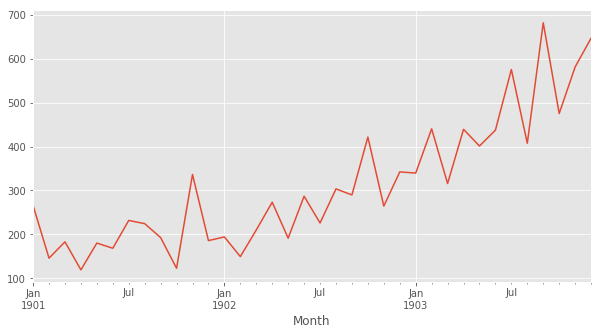

In [7]:
plt.figure(figsize=(10,5))
df_shampoo.plot()
plt.show()

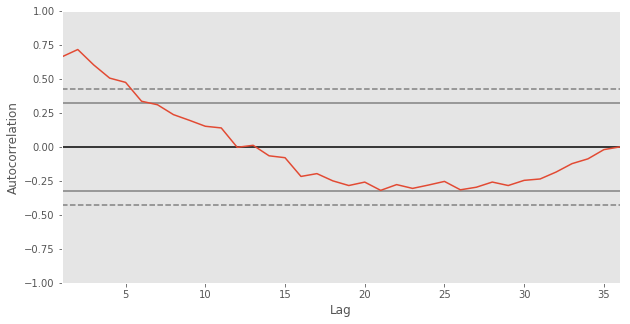

In [8]:
plt.figure(figsize=(10,5))
autocorrelation_plot(df_shampoo)
plt.show()

## Time-series Analysis

In [9]:
# fit model
model = ARIMA(df_shampoo, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Mon, 06 Jul 2020   AIC                            406.340
Time:                        11:32:48   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

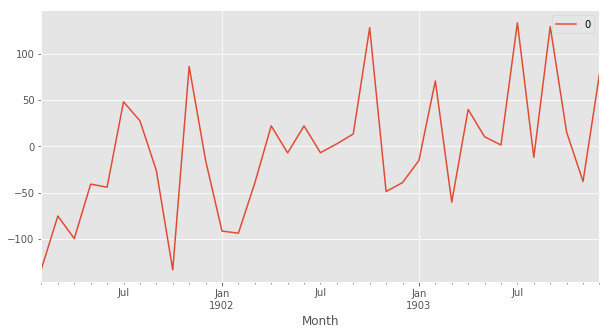

In [10]:
# line plot of the residual errors
# it suggests that there may still be some trend information not captured by the model
residuals = DataFrame(model_fit.resid)
residuals.plot(figsize=(10, 5))
plt.show()

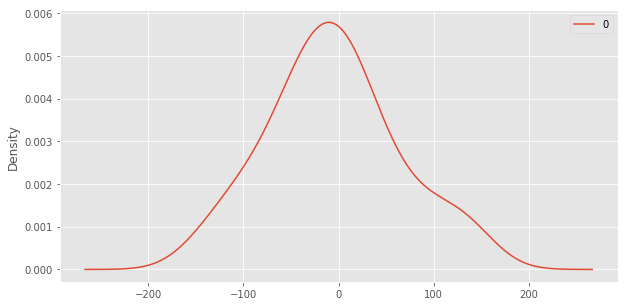

In [11]:
# density plot of the residual errors
residuals.plot(kind='kde', figsize=(10, 5))
plt.show()

# residuals.describe()

## Train ARIMA Model

In [12]:
X = df_shampoo.values
size = int(len(X) * 0.66)
train_data, test_data = X[0:size], X[size:len(X)]
history = [x for x in train_data]

predictions = list()

In [13]:
for index in range(len(test_data)):
    
    # perform rolling forecast by recreating the ARIMA model after each new observation is received
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    
    y_hat = output[0]
    predictions.append(y_hat)
    observation = test_data[index]
    history.append(observation)
    
    print(f'predicted={y_hat}, expected={observation}')
    
loss = mean_squared_error(test_data, predictions)
print('\nMSE Loss:', loss)

predicted=[349.11773935], expected=342.3
predicted=[306.51300171], expected=339.7
predicted=[387.37645286], expected=440.4
predicted=[348.15419775], expected=315.9
predicted=[386.3088244], expected=439.3
predicted=[356.08200826], expected=401.3
predicted=[446.37955215], expected=437.4
predicted=[394.73728111], expected=575.5
predicted=[434.915465], expected=407.6
predicted=[507.92341936], expected=682.0
predicted=[435.48285043], expected=475.3
predicted=[652.74388426], expected=581.3
predicted=[546.34350418], expected=646.9

MSE Loss: 6958.326616927669


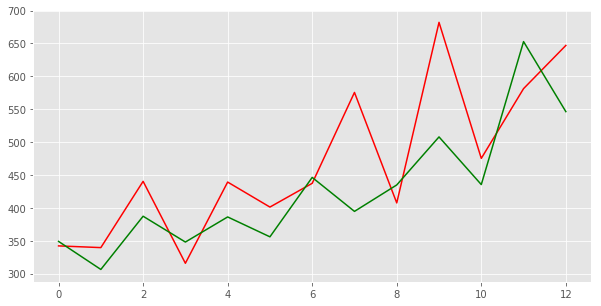

In [14]:
# plot result
plt.figure(figsize=(10,5))
plt.plot(test_data, color='red')
plt.plot(predictions, color='green')
plt.show()

---